# Introduction

The False Position Method, also known as the Regula Falsi method, is a root-finding algorithm used for finding the roots of a nonlinear equation. It is an iterative method that estimates the root of a function by adjusting the intervals.

# Steps Involved
1. Initial guess : Choose two initial guesses <em>a</em> and <em>b</em> such that <i>f(a) * f(b) < 0</i>
2. Compute the next approximation : Compute the value of x for the next iteration using the formula $$x=a+\frac{f(a)(a-b)}{f(b)-f(a)}$$
3. Function evaluation : Evaluate <i>f(x)</i> using the calculated value of x.
4. Update the guess : Update the interval based on the following conditions-
    - If <i>f(x) = 0</i>, then x is the root and the algorithim terminates
    - Otherwise, if <i>f(x) < 0</i>, then set <i>a = x</i> and if <i>f(x) > 0</i>, set <i>b = x</i>.
5. Repeat : Repeat steps 2-4 until desired level of accuracy is achieved.

# Program
The program is implemented using Python programming language.

## Required Libraries
The following libraries are imported for this program.
* matplotlib
* numpy
* sympy
* prettytable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy.utilities.lambdify import lambdify
from prettytable import PrettyTable

## Setting up the equation
Using <i>sympy</i> library, a symbolic equation is defined and stored in variable <i>exp</i>. The symbolic equation is then converted to a lambdified function. The initial lower bound, upper bound and the desired precision are stored in variables <i>a</i>, <i>b</i> and <i>precision</i> respectively.

In this program we are taking the function:
$$
f(x)=x^3-x-1
$$

within range <i>[-2,2]</i> and precision upto <i>4</i> digits after decimal.

In [3]:
#Equation and initialization
eqn_sbl=symbols('x')
exp=eqn_sbl**3-eqn_sbl-1
f=lambdify(eqn_sbl,exp,"numpy")
table=PrettyTable()
table.field_names=["n","a","b","f(a)","f(b)","x","f(x)","Sign of f(x)"]
n,a,b,precision=1,-2,2,4

### Initial Graph
Using the libary <i>matplotlib</i>, this program generates a graph for the given equation and also plots lower and upper bound.

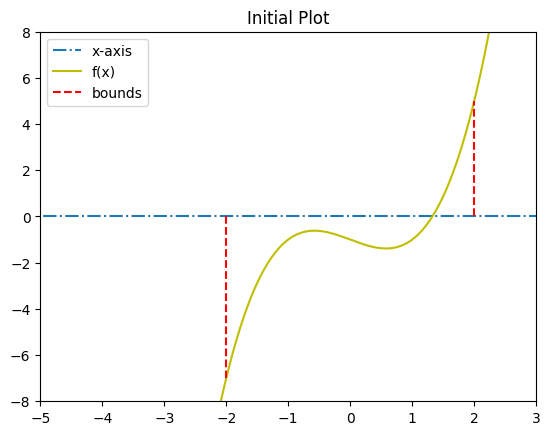

In [4]:
#initial graph 
x_values=np.arange(a-3,b+2,0.0001)
y_values=f(x_values)
plt.axis([-5,3,-8,8])
plt.hlines(0,-20,20,label="x-axis",linestyles="-.")
plt.plot(x_values,y_values,label="f(x)",color='y')
plt.vlines(a,0,f(a),color='r',linestyles='--',label="bounds")
plt.vlines(b,0,f(b),color='r',linestyles='--')
plt.legend()
plt.title("Initial Plot")
plt.show()


## Implementation
This code contains three functions that implements the logics in the program.

### x_calculator 
This function takes the value of lower and upper bound and caculates the value of x using the formula
$$x=\frac{af(b)-bf(a)}{f(b)-f(a)}$$


In [5]:
def x_calculator(a,b):
    x=(a*f(b)-b*f(a))/(f(b)-f(a))
    x=round(x,precision)
    return x

### addToTable 
This is a simple function that add the obtained values of <i>n</i>, <i>a</i>, <i>b</i>, <i>f(a)</i>, <i>f(b)</i>, <i>x</i> and <i>sign of f(x)</i> in a table, which is made using a libary called <i>prettytable</i>.

In [6]:
def addToTable(n,a,b,x):
    sign="+ve"
    if f(x)<0:sign="-ve"
    row=[n,a,b,round(f(a),precision),round(f(b),precision),x,round(f(x),precision),sign]
    table.add_row(row)

### falsePosition
This function contains the main logic of this program. A loop is initiated in this function which corresponds to the iterations taken to obtain the approximate root. In this function, the value of either <i>a</i> or <i>b</i> is replaced with the calculated value of <i>x</i>, depending on the <i>sign of f(x)</i>. The loop inside this function terminates if the exact root is obtained or if the root is repeated.

In [7]:
def falsePosition(a,b,n,prev_x):
    while(1):
        x=x_calculator(a,b)
        if (x==0): return x,n
        addToTable(n,a,b,x)
        if(f(x)<0):
            a=x
        else:
            b=x
        if(x==prev_x):
            return x,n
        prev_x=x
        n=n+1

# Output
The program displays the steps invloved in computing the approximate root in a tabular form and also plots the obtained root in a graph.

			Calculation Table

+----+--------+---+---------+------+--------+---------+--------------+
| n  |   a    | b |   f(a)  | f(b) |   x    |   f(x)  | Sign of f(x) |
+----+--------+---+---------+------+--------+---------+--------------+
| 1  |   -2   | 2 |    -7   |  5   | 0.3333 | -1.2963 |     -ve      |
| 2  | 0.3333 | 2 | -1.2963 |  5   | 0.6764 | -1.3669 |     -ve      |
| 3  | 0.6764 | 2 | -1.3669 |  5   | 0.9606 | -1.0742 |     -ve      |
| 4  | 0.9606 | 2 | -1.0742 |  5   | 1.1444 | -0.6456 |     -ve      |
| 5  | 1.1444 | 2 | -0.6456 |  5   | 1.2422 | -0.3254 |     -ve      |
| 6  | 1.2422 | 2 | -0.3254 |  5   | 1.2885 | -0.1493 |     -ve      |
| 7  | 1.2885 | 2 | -0.1493 |  5   | 1.3091 | -0.0656 |     -ve      |
| 8  | 1.3091 | 2 | -0.0656 |  5   | 1.3181 |  -0.028 |     -ve      |
| 9  | 1.3181 | 2 |  -0.028 |  5   | 1.3219 |  -0.012 |     -ve      |
| 10 | 1.3219 | 2 |  -0.012 |  5   | 1.3235 | -0.0052 |     -ve      |
| 11 | 1.3235 | 2 | -0.0052 |  5   | 1.3242 | -0.0022 |

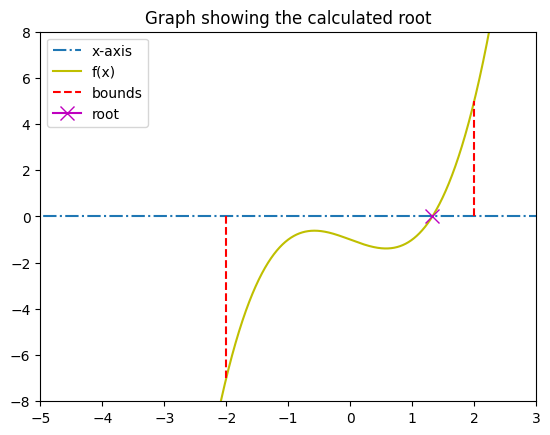

In [8]:

root,iteration=falsePosition(a,b,n,0)
#display
print("\t\t\tCalculation Table\n")
print(table)
print("\n\n")
print(f"From False Position Method, the approximate root after {iteration} iterations = {root}\n\n")
#root graph 
x_values=np.arange(a-3,b+2,0.0001)
y_values=f(x_values)
plt.axis([-5,3,-8,8])
plt.hlines(0,-20,20,label="x-axis",linestyles="-.")
plt.plot(x_values,y_values,label="f(x)",color='y')
plt.vlines(a,0,f(a),color='r',linestyles='--',label="bounds")
plt.vlines(b,0,f(b),color='r',linestyles='--')
plt.plot(root,0,label="root",marker="x",color='m',markersize=10)
plt.legend()
plt.title("Graph showing the calculated root")
plt.show()
